In [1]:
%matplotlib notebook

In [86]:
#create table
import sqlite3
conn = sqlite3.connect("test.db")
#conn = sqlite3.connect(":memory:")
conn.execute("drop table users")
conn.execute("create table users(id integer uniq primary key, skill real, win integer, lose integer, num_game integer, rating real)")
conn.commit()

In [87]:
#make users
import sqlite3
import numpy as np
import numpy.random as nrand

num = 100
init_rating = 1500
skils = nrand.logistic(50,10,num)

conn = sqlite3.connect("test.db")
#conn = sqlite3.connect(":memory:")
cur = conn.cursor()
for i in range(num):
    cur.execute("insert into users values(?,?,?,?,?,?)",[i,skils[i],0,0,0,1500])
conn.commit()

In [88]:
def calc_rating_increment(winner,loser):
    return winner+1,loser-1


In [89]:
def calc_rating_diff(winner,loser):
    return winner+loser*0.05, loser-150/(abs(winner-loser)+1)

In [90]:
def calc_rating_shogi_club24(winner,loser):
    new_winner = min(31,max(16+(winner-loser)*0.04,0))
    new_loser = min(31,max(16+(loser-winner)*0.04,0))
    return new_winner,new_loser

In [91]:
def calc_rating_elo(winner,loser):
    ew=1/(1+pow(10,(winner-loser)/400))
    el=1/(1+pow(10,(loser-winner)/400))
    rw=winner+32*(1-ew)
    rl=loser+32*(-el)
    return rw,rl

In [92]:
#ランダムで2人分取り出してバトル
def match_and_battle(n=1):
    for i in range(n):
        cur.execute("select * from users order by RANDOM() limit 2")
        battler = cur.fetchall()
        #print(battler)
        if(battler[0][1]>battler[1][1]):
            winner = list(battler[0])
            loser = list(battler[1])
        else:
            loser = list(battler[0])
            winner = list(battler[1])
        winner[2]+=1
        loser[3]+=1
        #winner[5],loser[5] = calc_rating_increment(winner[5],loser[5])
        #winner[5],loser[5] = calc_rating_diff(winner[5],loser[5])
        #winner[5],loser[5] = calc_rating_shogi_club24(winner[5],loser[5])
        winner[5],loser[5] = calc_rating_elo(winner[5],loser[5])
        cur.execute("update users set id=?,skill=?,win=?,lose=?,num_game=?,rating=? where id=?",winner+[winner[0]])
        cur.execute("update users set id=?,skill=?,win=?,lose=?,num_game=?,rating=? where id=?",loser+[loser[0]])
    conn.commit()

<IPython.core.display.Javascript object>


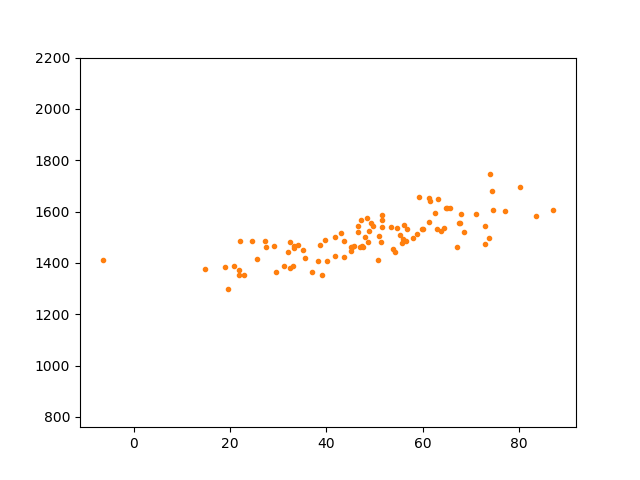

In [93]:
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig = plt.figure()
ims=[]
for i in range(1000):
    match_and_battle(1)
    cur.execute("select * from users")
    battler = cur.fetchall()
    x=[item[1] for item in battler]
    y=[item[5] for item in battler]
    im = plt.plot(x,y,".")
    ims.append(im)
ani = animation.ArtistAnimation(fig,ims)
plt.show()
    

In [249]:
cur.execute("select * from users order by win desc  limit 10")
battler = cur.fetchall()
print(battler)

[(34, 94.50535889023041, 85, 0, 0, 1585.0), (20, 76.33999685282369, 84, 4, 0, 1580.0), (25, 71.99970458679334, 81, 2, 0, 1579.0), (93, 67.00164603800722, 81, 9, 0, 1572.0), (19, 88.17162365002486, 75, 3, 0, 1572.0), (91, 86.27739086800804, 74, 2, 0, 1572.0), (30, 59.820219464723976, 73, 22, 0, 1551.0), (90, 103.91204187993237, 70, 0, 0, 1570.0), (26, 63.99085955218099, 69, 9, 0, 1560.0), (33, 66.50077389976786, 69, 11, 0, 1558.0)]


In [12]:
abs(19)

19